In [1]:
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import missingno as msno
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import plotly.offline as py
from wordcloud import WordCloud, STOPWORDS

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
#df = pd.read_csv('/content/drive/Shareddrives/Date Another Day_4523DA/Datasets/Levels_Fyi_Salary_Data.csv')

Mounted at /content/drive/


# Data Description

In [3]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [4]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [6]:
# Missing data percentage of each column
missing = df.isna().sum() 
print("The percentage of each feature's missing values are as follow:")
round(missing / len(df) * 100, 2)

The percentage of each feature's missing values are as follow:


timestamp                   0.00
company                     0.01
level                       0.19
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
tag                         1.36
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     31.19
otherdetails               35.93
cityid                      0.00
dmaid                       0.00
rowNumber                   0.00
Masters_Degree              0.00
Bachelors_Degree            0.00
Doctorate_Degree            0.00
Highschool                  0.00
Some_College                0.00
Race_Asian                  0.00
Race_White                  0.00
Race_Two_Or_More            0.00
Race_Black                  0.00
Race_Hispanic               0.00
Race                       64.20
Education                  51.52
dtype: float64

In [7]:
#nonzeros in each column 
df.astype(bool).sum(axis=0)

timestamp                  62642
company                    62642
level                      62642
title                      62642
totalyearlycompensation    62642
location                   62642
yearsofexperience          58039
yearsatcompany             46726
tag                        62642
basesalary                 60338
stockgrantvalue            45464
bonus                      47215
gender                     62642
otherdetails               62642
cityid                     62640
dmaid                      52816
rowNumber                  62642
Masters_Degree             15391
Bachelors_Degree           12605
Doctorate_Degree            1803
Highschool                   320
Some_College                 355
Race_Asian                 11772
Race_White                  8032
Race_Two_Or_More             804
Race_Black                   690
Race_Hispanic               1130
Race                       62642
Education                  62642
dtype: int64

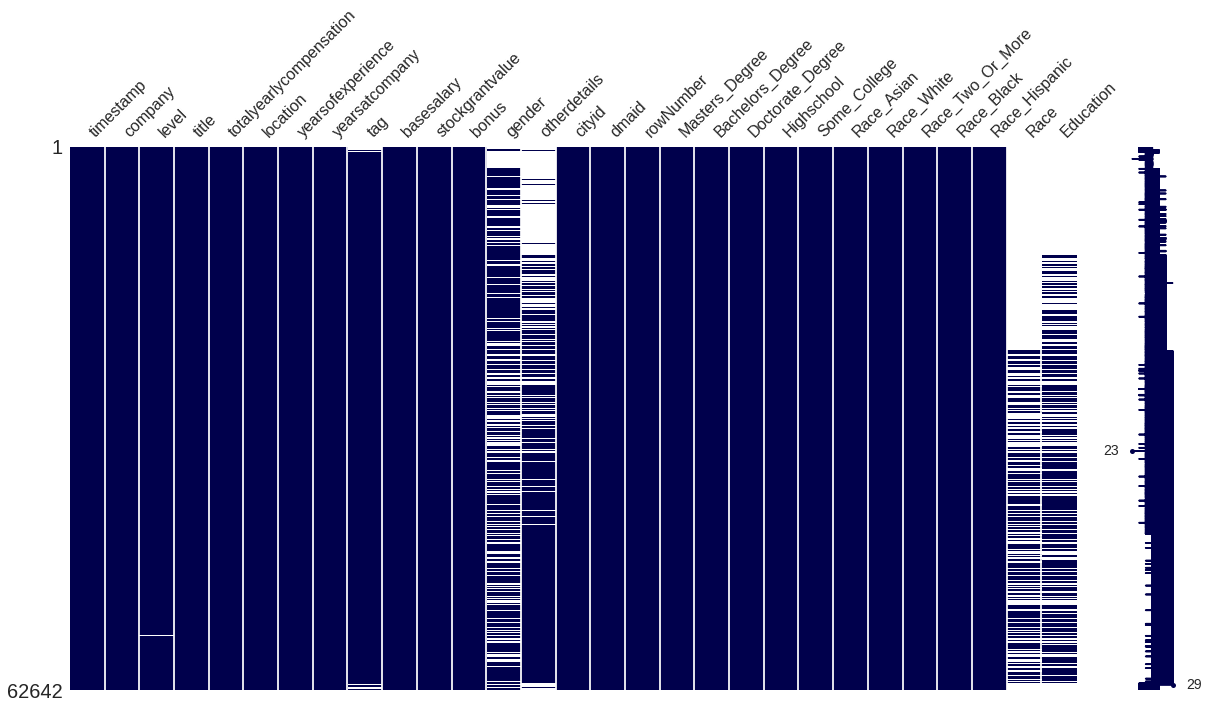

In [9]:
# Dispersion Plot of each column
msno.matrix(df, figsize=(20, 10), color=(0., 0., 0.3))


In [10]:
# Correlation of each column
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


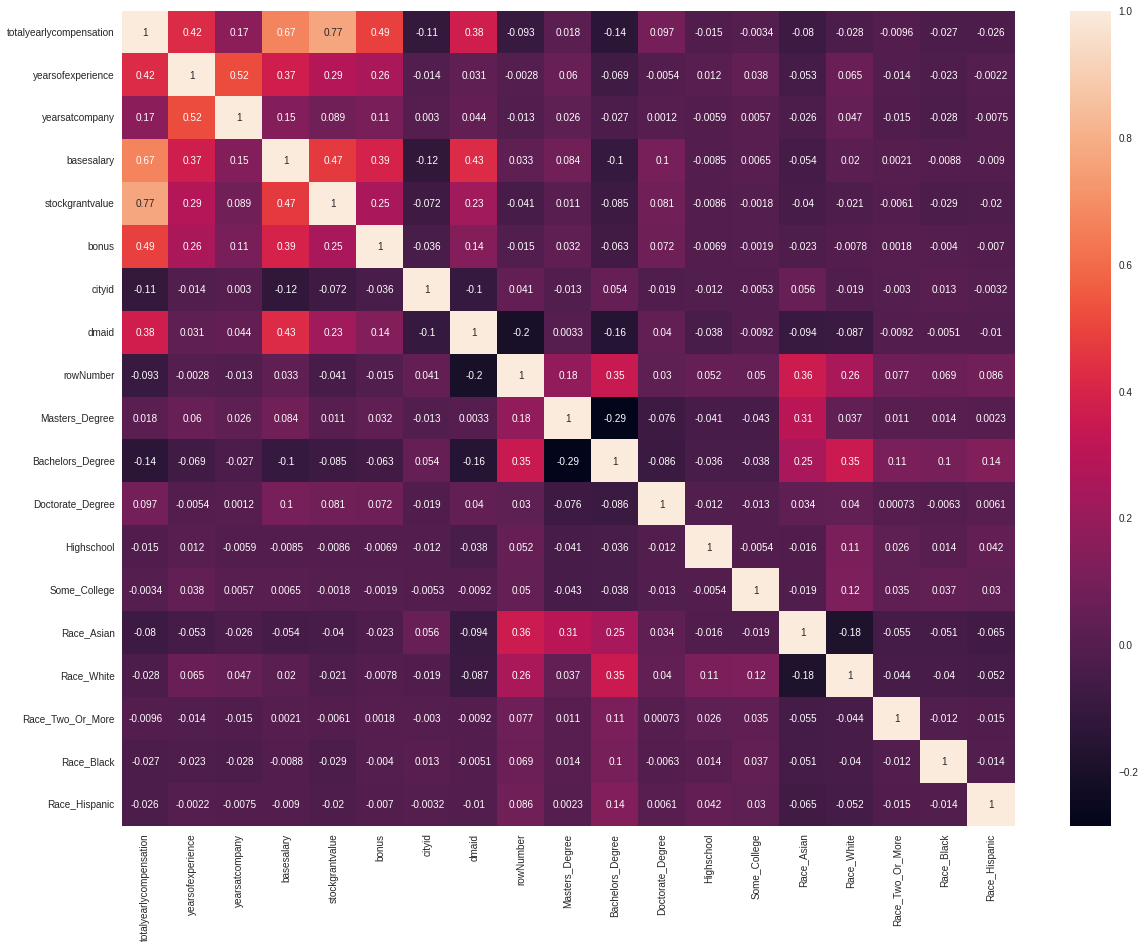

In [11]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True)

# Data Cleaning

In [12]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [8]:
#Drop columns with no predicting power
df = df.drop(['cityid', 'dmaid','rowNumber','tag','otherdetails'], axis=1)
df = df.replace("", np.nan)

In [9]:
df[df['basesalary'] == 0]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
12,7/3/2017 19:28:09,Microsoft,63,Product Manager,150000,"Redmond, WA",10.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11007,9/17/2019 0:07:31,Apple,ICT3,Software Engineer,240000,"Cupertino, CA",10.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
14957,1/14/2020 16:53:56,Facebook,E4,Software Engineer,195000,"Menlo Park, CA",3.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
14974,1/14/2020 21:41:27,IBM,Senior Technical Staff Member,Software Engineer,240000,"San Francisco, CA",15.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
14979,1/14/2020 23:09:20,Spotify,Staff Engineer,Software Engineer,310000,"New York, NY",9.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


### Gender

In [10]:
df['gender'] = df['gender'].fillna('Unknown')
df = df[df['gender']!='Title: Senior Software Engineer']
# df = pd.get_dummies(df,columns=["gender"] )

### Location

In [11]:
# Only include records that are in the U.S.
df_l = df['location'].str.split(',', expand=True)
df_l = df_l.iloc[:,:3]
df_l.columns = ['City', 'State', 'Country']
df_l['Country'] = df_l['Country'].fillna('United States')
df = pd.concat([df, df_l], axis=1)
df = df.drop(["location"],axis =1)
df = df[df['Country'] == "United States"]


In [17]:
# check if all values in State columns are in the 50 state list
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
df_state = list(pd.unique(df['State']))
l = []
for i in df_state:
  if i[1:] not in states:
    l.append(i[1:])
l
# the list is empty, so all values are correct

['Israel']

In [18]:
# Filter top 10 states
top_ten_states = list(df.State.value_counts().nlargest(10).index)
filt = top_ten_states
df = df[df["State"].isin(filt)]

### Title

In [19]:
# Only include 5 major titles 
filt = ["Software Engineer","Product Manager","Software Engineering Manager","Data Scientist","Hardware Engineer"]
df = df[df["title"].isin(filt)]

### Timestamp

In [20]:
# Create categories for Timestamp column, extract Year
df['Year'] = pd.DatetimeIndex(df['timestamp']).year

### Company

In [21]:
#Only include top 7 companies for analysis
df = df[(df["company"]=="Amazon") | (df["company"]=="Microsoft")|(df["company"]=="Google")|(df["company"]=="Facebook")|(df["company"]=="Apple")|(df["company"]=="Oracle")|(df["company"]=="Salesforce")]

### Outliers

In [22]:
outlier_detect_df = df[['totalyearlycompensation','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a5984d190>,
      dtype=object)

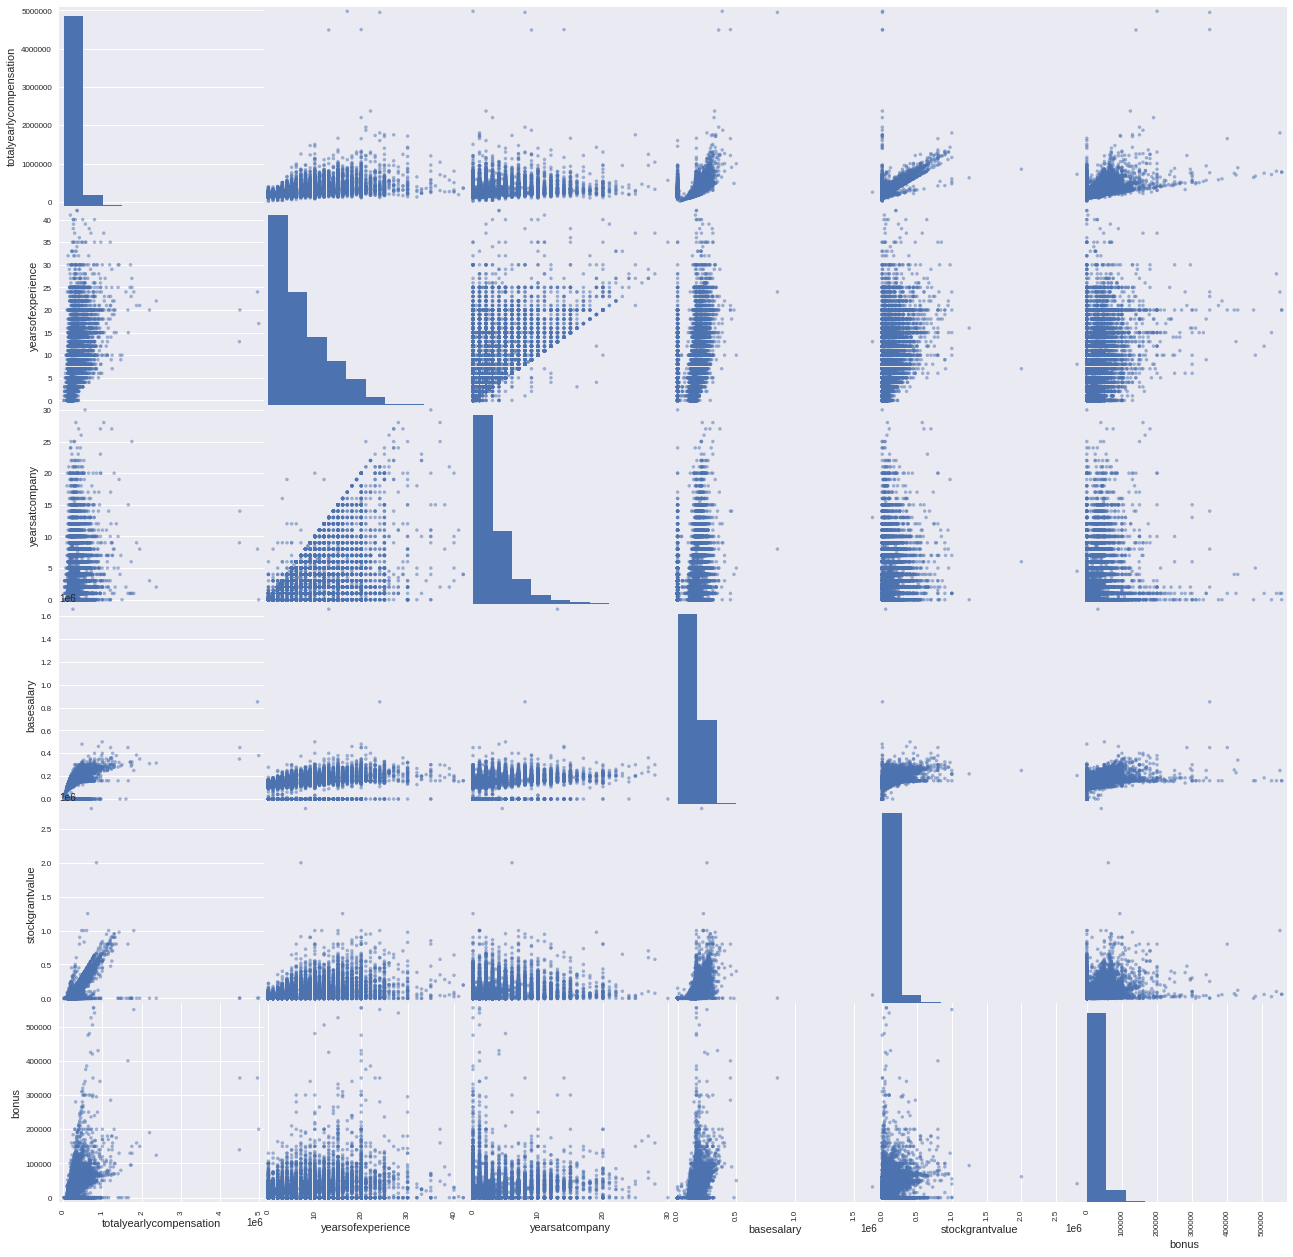

In [23]:
pd.plotting.scatter_matrix(outlier_detect_df, alpha=0.5, figsize=(22,22))

#### For reference:
<li>Outliers in our dataset:
        <li>- total_yearly_compensation > 4000000
        <li>- years_at_company > years_of_experience

<li>There is no linear relationship between working experience and salary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



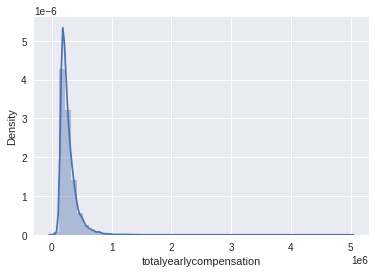

In [24]:
sns.distplot(df['totalyearlycompensation'])

In [25]:
df['totalyearlycompensation'].describe()

count    1.844500e+04
mean     2.737409e+05
std      1.561481e+05
min      1.800000e+04
25%      1.830000e+05
50%      2.330000e+05
75%      3.180000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

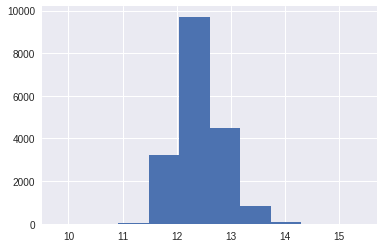

In [26]:
#log transformation for right skewness
df['totalyearlycompensation'] = np.log(df['totalyearlycompensation'])
plt.hist(df.totalyearlycompensation)
plt.show()

In [27]:
upper_limit = df['totalyearlycompensation'].mean() + 3*df['totalyearlycompensation'].std()
lower_limit = df['totalyearlycompensation'].mean() - 3*df['totalyearlycompensation'].std()
df = df[(df['totalyearlycompensation']< upper_limit) & (df['totalyearlycompensation']>lower_limit)]

In [28]:
df[(df['totalyearlycompensation'] > upper_limit) | (df['totalyearlycompensation'] < lower_limit)]
#Can drop outliers if want to

,timestamp,company,level,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,City,State,Country,Year


# EDA

### Time Feature

In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [30]:
year = df.timestamp.dt.year
year_counts = year.value_counts()
year_counts

2020    6694
2021    4902
2019    4594
2018    1972
2017     134
Name: timestamp, dtype: int64

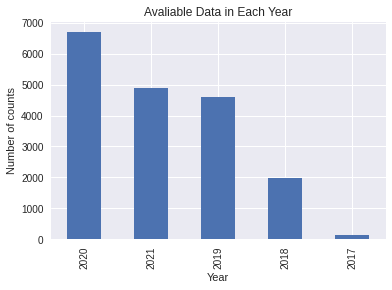

In [31]:
year_counts.plot(kind='bar',title='Avaliable Data in Each Year')
plt.xlabel('Year')
plt.ylabel("Number of counts")
plt.show()

### Location feature

In [32]:
text = df['State'].tolist()
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1

In [33]:
text = listToString(text)

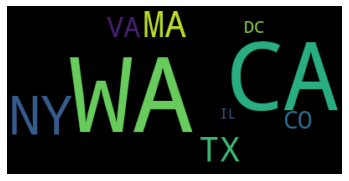

In [34]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('State.jpg')
plt.show()

In [35]:
af = df['State'].value_counts()
s = af.to_frame()
s.reset_index(inplace=True)

for i in range(10):
    s['index'][i] = s['index'][i].strip()

for j in range(len(states)):
    if states[j] not in list(s['index']): 
        s=s.append({'index': states[j], 'State': 0}, ignore_index=True)
        


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = s['index'],
        z = s['State'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Count of employees"
        )
    ) ]

layout = dict(
        title = 'STEM employees working base map',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict( data=data, layout=layout )

url = py.plot(fig, filename='d3-cloropleth-map' )

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `d3-cloropleth-map` didn't end with .html. Adding .html to the end of your file.



### Company Feature

In [37]:
print(df.company.nunique())
print(df.company.value_counts())

7
Amazon        5722
Microsoft     3874
Google        3143
Facebook      2248
Apple         1724
Oracle         797
Salesforce     788
Name: company, dtype: int64


In [38]:
company = df.company.value_counts()[df.company.value_counts() >= 1000]
company = company[:8]

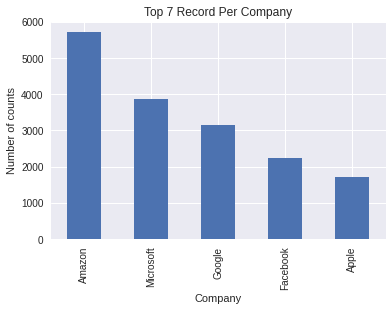

In [39]:
company.plot(kind='bar',title='Top 7 Record Per Company') 
plt.xlabel('Company')
plt.ylabel("Number of counts")
plt.show()

In [40]:
# #select top 7 companies for analysis
# df = df[(df["company"]=="Amazon") | (df["company"]=="Microsoft")|(df["company"]=="Google")|(df["company"]=="Facebook")|(df["company"]=="Apple")|(df["company"]=="Oracle")|(df["company"]=="Salesforce")]

<Figure size 2880x2880 with 0 Axes>

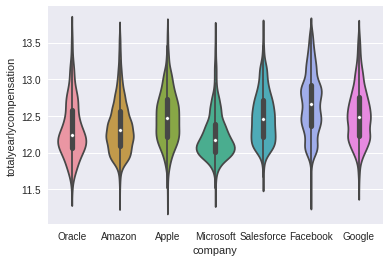

<Figure size 2880x2880 with 0 Axes>

In [41]:
ax = sns.violinplot(x="company", y="totalyearlycompensation", data=df)
plt.figure(figsize=(40, 40))

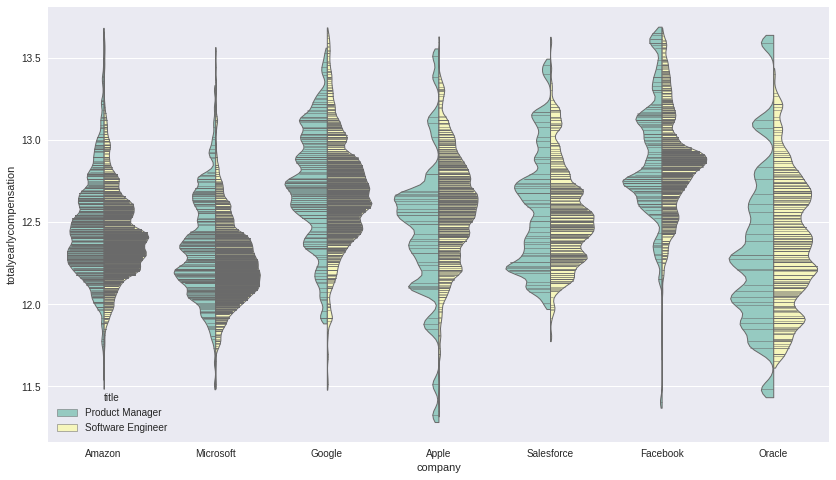

In [42]:
#violin plot of the two most popular positions
faang = df.query("company in ('Facebook','Amazon','Apple','Salesforce','Google','Microsoft','Oracle') and title in ('Product Manager','Software Engineer') and yearsofexperience>4 and yearsofexperience<16 ")

plt.figure(figsize=(14, 8))
g = sns.violinplot(data=faang, palette="Set3", split = True, x='company',hue='title',y='totalyearlycompensation',
                   inner='stick', bw=.1, cut=1, linewidth=1)



### Title Feature

In [43]:
#filter title 
# filt = ["Software Engineer","Product Manager","Software Engineering Manager","Data Scientist","Hardware Engineer"]
# df = df[df["title"].isin(filt)]

In [44]:
df.title.value_counts()

Software Engineer               13522
Product Manager                  1991
Software Engineering Manager     1326
Data Scientist                    775
Hardware Engineer                 682
Name: title, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



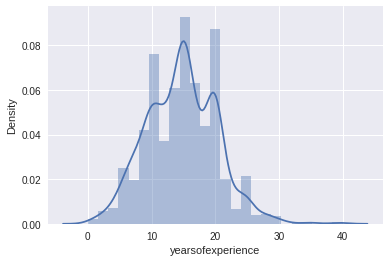

In [45]:
#If want to dive into a particular title
software_engineering_manager = df[df['title'] == 'Software Engineering Manager']
sns.distplot(software_engineering_manager['yearsofexperience'])

#### Can explore top companies for, say Software Engineer & Product Manager

### Race Feature

In [46]:
df.groupby('Race').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Year
Race,,,,,,,,,,,,,,,,,
Asian,36423.149972,18137.0,7233.0,461616000.0,233729000.0,71703000.0,1733,931,194,10,6,2937,0,0,0,0,5934573
Black,1651.949316,736.0,235.0,19092000.0,7541000.0,3285000.0,44,80,2,1,4,0,0,0,135,0,272773
Hispanic,3622.648360,1873.0,634.0,44206000.0,19312000.0,7172000.0,77,180,16,8,4,0,0,0,0,294,594034
Two Or More,2431.178395,1254.0,463.0,30533000.0,15961000.0,6139000.0,58,109,12,5,7,0,0,196,0,0,396028
White,20028.317258,13390.0,4888.0,262012000.0,149354000.0,41122000.0,441,886,145,29,50,0,1607,0,0,0,3247070


In [47]:
df.Race.value_counts()

Asian          2937
White          1607
Hispanic        294
Two Or More     196
Black           135
Name: Race, dtype: int64

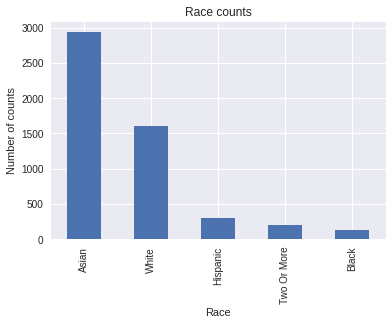

In [48]:
df.Race.value_counts().plot(kind='bar')
plt.xlabel("Race")
plt.ylabel("Number of counts")
plt.title("Race counts")
plt.show()

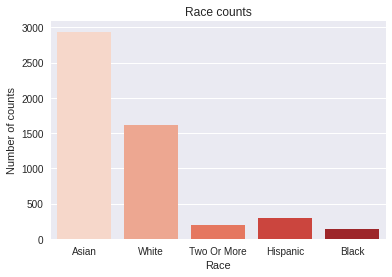

In [49]:
sns.countplot(data = df, x = 'Race', palette="Reds")
plt.xlabel("Race")
plt.ylabel("Number of counts")
plt.title("Race counts")
plt.show()

### Education Level

In [50]:
df.groupby('Education').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Year
Education,,,,,,,,,,,,,,,,,
Bachelor's Degree,30215.278369,15040.0,6388.0,373391000.0,183662000.0,56377000.0,0,2445,0,0,0,931,885,109,80,180,4940313
Highschool,715.382075,374.0,109.0,8756000.0,4098000.0,1281000.0,0,0,0,58,0,10,29,5,1,8,117199
Master's Degree,54436.626140,32260.0,11002.1,703355000.0,368820000.0,110665000.0,4378,1,40,0,0,1733,441,58,44,77,8844974
PhD,8795.642401,4585.0,1687.0,123451000.0,82750000.0,24108000.0,0,0,696,0,0,194,145,12,2,16,1406111
Some College,922.941201,869.0,227.0,12598000.0,7046000.0,2027000.0,0,0,0,0,74,6,50,7,4,4,149519


In [51]:
df.Education.value_counts()

Master's Degree      4378
Bachelor's Degree    2445
PhD                   696
Some College           74
Highschool             58
Name: Education, dtype: int64

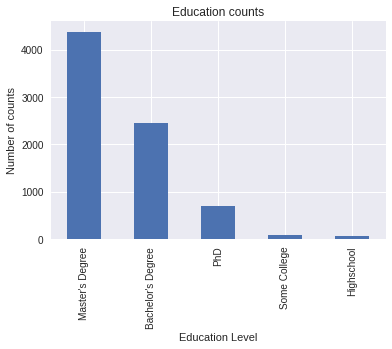

In [52]:
df.Education.value_counts().plot(kind='bar')
plt.xlabel("Education Level")
plt.ylabel("Number of counts")
plt.title("Education counts")
plt.show()

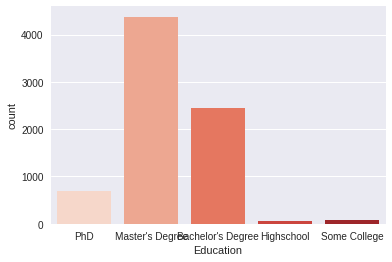

In [53]:
sns.countplot(data = df, x = 'Education', palette="Reds")

### Gender Feature

In [54]:
df.groupby('gender').sum()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Year
gender,,,,,,,,,,,,,,,,,
Female,22867.413869,10146.75,4040.750,2.702306e+08,116395815.0,42036350.0,679,402,86,1,7,549,216,37,24,39,3751155
Male,131532.222172,75634.15,28186.626,1.627696e+09,864369219.0,260745719.0,3220,1922,529,52,63,2382,1377,145,110,251,21398134
Other,1259.208983,687.00,254.500,1.465100e+07,8342000.0,4181000.0,26,8,6,2,2,0,8,12,1,4,204000
Unknown,71459.338876,42142.45,15776.850,8.251085e+08,465697458.0,132107474.0,453,114,115,3,2,6,6,2,0,0,11600593


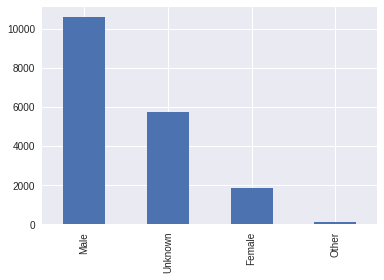

In [55]:
df.gender.value_counts().plot(kind='bar')

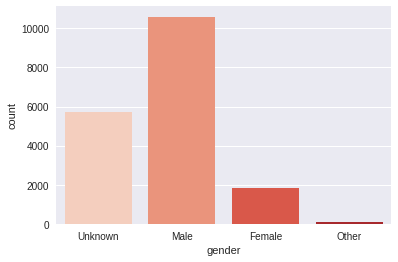

In [56]:
sns.countplot(data = df, x = 'gender', palette="Reds")

### Yearly Compensation

<h4> Can discover relationships b/w totalyearlycompensation & different features </h4>
<li> Years at the company, toal years of experience
<li> Gender, race, educational level
<li> Location, company, job title, level
<li> Compensation for xxx(job title) by race/education/location...
<li> Compensation for xxx(job title) across companies

In [57]:
cond_mean = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("mean")
cond_std = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("std")
print(cond_mean)
print(cond_std)

Education
Bachelor's Degree    12.357987
Highschool           12.334174
Master's Degree      12.434131
PhD                  12.637417
Some College         12.472178
Name: totalyearlycompensation, dtype: float64
Education
Bachelor's Degree    0.370146
Highschool           0.372360
Master's Degree      0.366368
PhD                  0.370515
Some College         0.480999
Name: totalyearlycompensation, dtype: float64


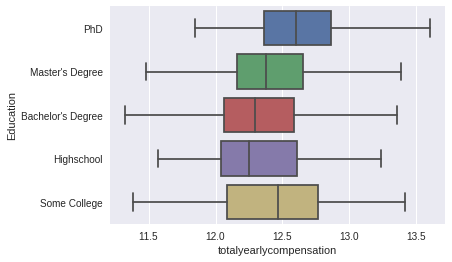

In [58]:
#Outliers removed version
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=df, showfliers = False)

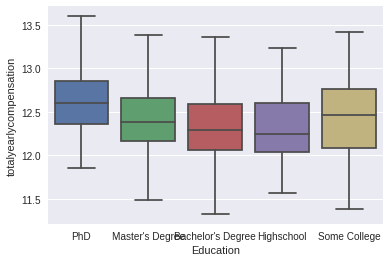

In [59]:
ax = sns.boxplot(x="Education", y="totalyearlycompensation", data=df, orient = "v", showfliers = False)

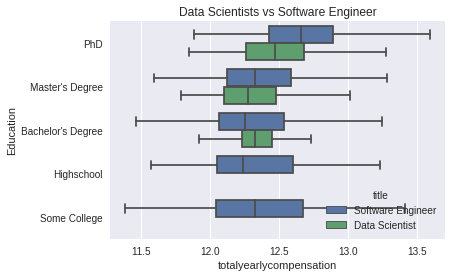

In [60]:
# A way to discover the influce of job titles
my_job = ["Data Scientist","Software Engineer"]
data_t = df[df["title"].isin(my_job)]
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=data_t, hue = "title", orient = "h", showfliers = False)
ax.set_title("Data Scientists vs Software Engineer")
plt.show()

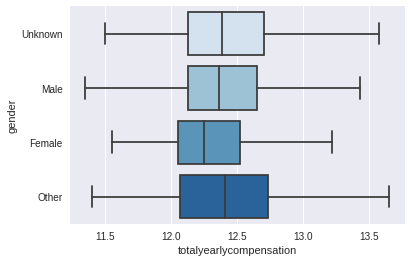

In [61]:
ax = sns.boxplot(x="totalyearlycompensation", y="gender", data=df, palette="Blues", showfliers = False)

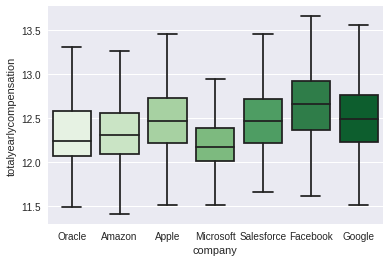

In [62]:
ax = sns.boxplot(x="company", y="totalyearlycompensation", data=df, palette="Greens", showfliers = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



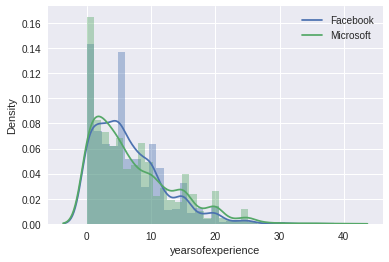

In [63]:
# Comparing FB & MS (Q1 of FB is almost the same as Q3 of MS)

facebook = df[df['company'] == 'Facebook']
microsoft = df[df['company'] == 'Microsoft']
sns.distplot(facebook['yearsofexperience'])
sns.distplot(microsoft['yearsofexperience'])

plt.legend(['Facebook', 'Microsoft'])
plt.show()

# Data Modeling

In [99]:
# Save dataset with all features, before one hot encoding
df_no_dummy = df[['company','title','totalyearlycompensation','yearsofexperience','yearsatcompany','gender', 'Race','Education','State', 'Year' ]]
df_no_dummy = df_no_dummy.reset_index(drop=True)
df_no_dummy.to_csv('cleaned_no_dummy.csv')


In [100]:
# Save dataset with all features, after one hot encoding
df_dummy = df.drop(['timestamp', 'level', 'basesalary', 'stockgrantvalue', 'bonus', 'City', 'Country','Race','Education'], axis=1)
df_dummy = df_dummy.reset_index(drop=True)
df_dummy = pd.get_dummies(df_dummy,columns=["company"] )
df_dummy = pd.get_dummies(df_dummy,columns=["title"] )
df_dummy = pd.get_dummies(df_dummy,columns=["State"] )
df_dummy = pd.get_dummies(df_dummy,columns=["Year"] )
df_dummy = pd.get_dummies(df_dummy,columns=["gender"] )
df_dummy.to_csv('cleaned_dummy.csv')

In [101]:
cc = pd.read_csv("cleaned_dummy.csv",index_col=0)

In [102]:
df_dummy=cc.copy()
df_dummy.shape

(18296, 44)

## Base Model

In [107]:
# Train test split
train, test=train_test_split(df_dummy,test_size=0.2)
train.shape[0],test.shape[0]

TrainingX=train.iloc[:,1:-1]
Trainingy=train.iloc[:,0]
TestingX=test.iloc[:,1:-1]
Testingy=test.iloc[:,0]

In [108]:
lr_model = LinearRegression()
y_pred_lr = model_result(lr_model, TrainingX, Trainingy, TestingX, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.5345040876882324
Testing Mean Squared Error: 0.06962328019756739
--------- Training Accuracy ----------
Training R_square: 0.5465944094978432
Training Mean Squared Error: 0.06850009203418214


## Feature Selection

In [109]:
## standardize features 
modelX=StandardScaler().fit(TrainingX)
TrainingXsd=pd.DataFrame(modelX.transform(TrainingX))
TestingXsd=pd.DataFrame(modelX.transform(TestingX))

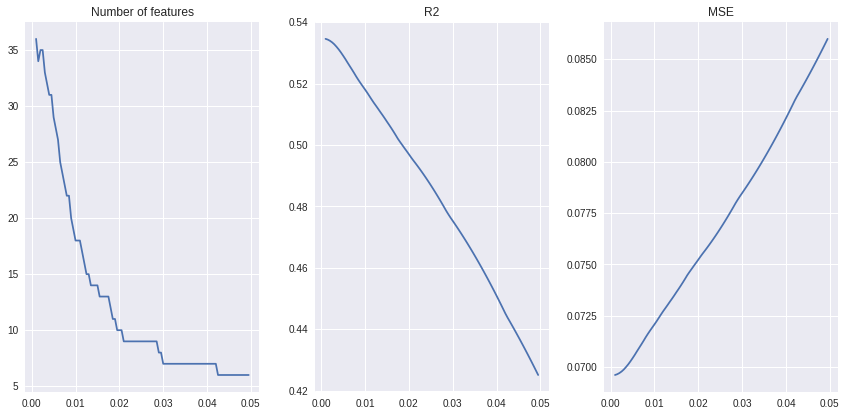

In [110]:
def Routofsample(Actual, Prediction):
    #R2=1-np.sum((Prediction-Actual)**2)/np.sum((Actual-np.mean(Actual))**2)
    R2 = r2_score(Actual, Prediction)
    return R2
def Lasso_function(a):
    model=Lasso(alpha=a, fit_intercept=False)
    model.fit(TrainingXsd,Trainingy-np.mean(Trainingy))
    Prediction=model.predict(TestingXsd)+np.mean(Trainingy)
    return np.sum(~(model.coef_==0)), Routofsample(Testingy, Prediction), mse(Testingy, Prediction)
  
alpha_array= np.arange(0.001,0.05,0.0005)
returns=np.array([Lasso_function(alpha) for alpha in alpha_array])
Number_Variables=returns[:,0]
R2=returns[:,1]
MSE=returns[:,2]

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.plot(alpha_array,Number_Variables)
ax1.title.set_text("Number of features")
ax2.plot(alpha_array,R2)
ax2.title.set_text("R2")
ax3.plot(alpha_array,MSE)
ax3.title.set_text("MSE")
fig.tight_layout()
plt.show()

In [111]:
best_alpha=alpha_array[np.argmax(R2)]
print("best alpha", best_alpha)
print("corresponding R2",np.max(R2))

best alpha 0.001
corresponding R2 0.5345820122828671


In [112]:
def Lasso_function(best_alpha):
    model=Lasso(alpha=best_alpha, fit_intercept=False)
    model.fit(TrainingXsd,Trainingy-np.mean(Trainingy))
    Prediction=model.predict(TestingXsd)+np.mean(Trainingy)
    return model.coef_

selected_feature = df_dummy.columns[1:-1][~(Lasso_function(best_alpha)==0)]
selected_feature

Index(['yearsofexperience', 'yearsatcompany', 'Masters_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic',
       'company_Amazon', 'company_Apple', 'company_Facebook', 'company_Google',
       'company_Microsoft', 'company_Oracle', 'title_Data Scientist',
       'title_Hardware Engineer', 'title_Product Manager',
       'title_Software Engineering Manager', 'State_ CA', 'State_ CO',
       'State_ DC', 'State_ IL', 'State_ MA', 'State_ NY', 'State_ OR',
       'State_ TX', 'State_ VA', 'Year_2017', 'Year_2018', 'Year_2021',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

In [113]:
Reweighted_coefficient=Lasso_function(best_alpha)/TrainingX.std()
Reweighted_coefficient=Reweighted_coefficient[Reweighted_coefficient!=0]
Reweighted_coefficient

yearsofexperience                     0.033609
yearsatcompany                        0.008489
Masters_Degree                        0.026826
Doctorate_Degree                      0.193927
Highschool                           -0.036901
Some_College                         -0.083182
Race_Asian                           -0.015628
Race_White                           -0.014571
Race_Two_Or_More                     -0.005709
Race_Black                           -0.059750
Race_Hispanic                        -0.073965
company_Amazon                       -0.061183
company_Apple                         0.047524
company_Facebook                      0.258540
company_Google                        0.106103
company_Microsoft                    -0.178944
company_Oracle                       -0.155064
title_Data Scientist                 -0.026702
title_Hardware Engineer              -0.060197
title_Product Manager                 0.029293
title_Software Engineering Manager    0.209150
State_ CA    

In [114]:
len(Reweighted_coefficient),df_dummy.shape[1]
len(selected_feature)

36

In [115]:
# dropped features
df_dummy.columns[1:-1][(Lasso_function(best_alpha)==0)]

Index(['Bachelors_Degree', 'company_Salesforce', 'title_Software Engineer',
       'State_ WA', 'Year_2019', 'Year_2020'],
      dtype='object')

## Fit Model


In [116]:
# print model accuracy
def model_result(model, X_train,y_train,X_test, y_test):
    print("--------- Testing Accuracy ----------")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Testing R_square:",r2_score(y_test, y_pred))
    print('Testing Mean Squared Error:',mse(y_test, y_pred))
    print("--------- Training Accuracy ----------")
    y_train_pred = model.predict(X_train)
    print("Training R_square:",r2_score(y_train, y_train_pred))
    print('Training Mean Squared Error:',mse(y_train, y_train_pred))

    return y_pred

In [117]:
# search for best parameters
def parameter_search(regressor, X_train, y_train, hyperF):
    gridF = GridSearchCV(regressor, hyperF, cv = 3, verbose = 1, n_jobs = -1, scoring='neg_mean_squared_error')
    gridF.fit(X_train, y_train)
    return gridF.best_params_

### Linear Regression with LASSO Selected Features

In [81]:
lr_train = train[selected_feature]
lr_test = test[selected_feature]
 
lr_scaler = StandardScaler()
lr_scaler.fit(lr_train)
lr_train = lr_scaler.transform(lr_train)
lr_test = lr_scaler.transform(lr_test)

# fit model & check accuracy
lr_model = LinearRegression()
lr_test_pred = model_result(lr_model, lr_train, Trainingy, lr_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.5577125261284788
Testing Mean Squared Error: 0.06513770193114282
--------- Training Accuracy ----------
Training R_square: 0.540667477058942
Training Mean Squared Error: 0.06964811131180254


### Random Forest 

In [118]:
rf_train = train[selected_feature]
rf_test = test[selected_feature]

# fit model & check accuracy
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_test_pred = model_result(rf_model, rf_train, Trainingy, rf_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.5820591157316607
Testing Mean Squared Error: 0.06251057103149148
--------- Training Accuracy ----------
Training R_square: 0.6119646821056062
Training Mean Squared Error: 0.0586240124627503


In [139]:
# hyperparameter tuning by GridSearchCV
n_estimators = [300]
max_depth = [15, 16, 17, 18]
min_samples_split = [38, 39, 40, 41]
min_samples_leaf = [2, 3, 5]
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

best_param = parameter_search(rf_model, rf_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
best parameters: {'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 39, 'n_estimators': 300}


In [140]:
# fit model using best parameters
rf_best_model = RandomForestRegressor(n_estimators=300, max_depth=18, min_samples_leaf=2, min_samples_split=39, random_state=0, n_jobs=-1)
rf_test_pred = model_result(rf_best_model, rf_train, Trainingy, rf_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.6073721272598551
Testing Mean Squared Error: 0.058724555198356995
--------- Training Accuracy ----------
Training R_square: 0.6941099559406422
Training Mean Squared Error: 0.04621358141437906


In [86]:
# generate importance of features
importance = rf_best_model.fit(rf_train, Trainingy).feature_importances_
feature_score = list(zip(list(selected_feature), importance))
feature_score.sort(key = lambda x: x[1], reverse=True)
fs = pd.DataFrame(importance, index=selected_feature, columns=['Importance'])
fs.sort_values(by=['Importance'], inplace=True)

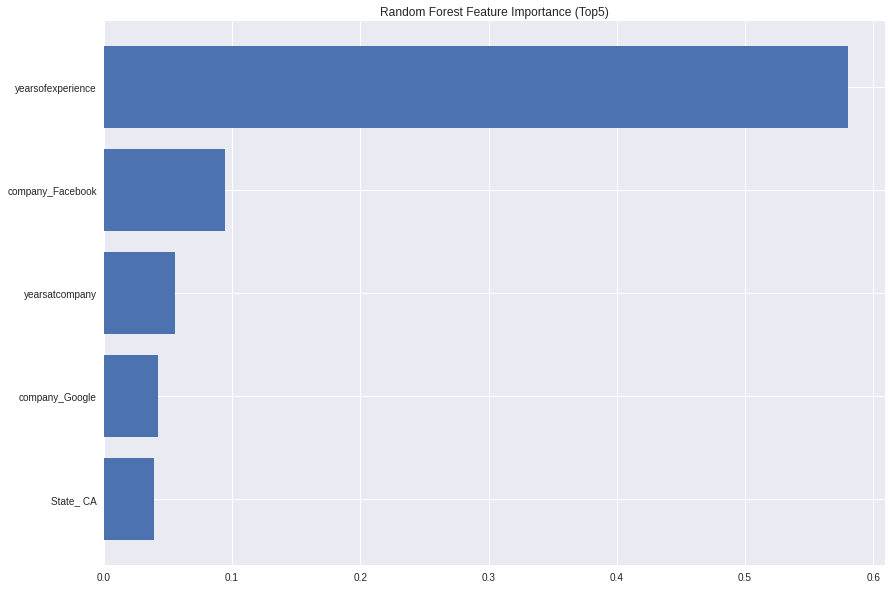

In [87]:
plt.figure(figsize=(14, 10))
plt.barh(fs[-5:].index, fs['Importance'][-5:])
plt.title('Random Forest Feature Importance (Top5)')
plt.rcParams["font.size"] = "14"
plt.show()

### XGB

In [91]:
xgb_train = train[selected_feature]
xgb_test = test[selected_feature]
xgb_model = XGBRegressor()
xgb_test_pred = model_result(xgb_model, xgb_train, Trainingy, xgb_test, Testingy)

--------- Testing Accuracy ----------
[14:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R_square: 0.6168013347493476
Testing Mean Squared Error: 0.05643542246181615
--------- Training Accuracy ----------
Training R_square: 0.6220243114959269
Training Mean Squared Error: 0.057312059371561155


In [92]:
# hyperparameter tuning by GridSearchCV
hyperF = {'n_estimators': [300],
          'max_depth': [6, 7, 8],
          'min_child_weight': [29, 30, 31],
          'learning_rate': [0.05]}
#hyperF = dict(n_neighbors = n_neighbors, leaf_size = leaf_size)

best_param = parameter_search(xgb_model, xgb_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[14:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 30, 'n_estimators': 300}


In [93]:
# fit model using best parameters
xgb_best_model = XGBRegressor(n_estimators=300, max_depth=7, min_child_weight=30, learning_rate=0.05)
xgb_test_pred = model_result(xgb_best_model, xgb_train, Trainingy, xgb_test, Testingy)

--------- Testing Accuracy ----------
[14:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R_square: 0.6289886181964404
Testing Mean Squared Error: 0.05464054541142589
--------- Training Accuracy ----------
Training R_square: 0.6734621584645706
Training Mean Squared Error: 0.049512592291867184


In [94]:
# generate importance of features
importance = xgb_best_model.fit(xgb_train, Trainingy).feature_importances_
feature_score = list(zip(list(selected_feature), importance))
feature_score.sort(key = lambda x: x[1], reverse=True)
fs = pd.DataFrame(importance, index=selected_feature, columns=['Importance'])
fs.sort_values(by=['Importance'], inplace=True)

[14:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


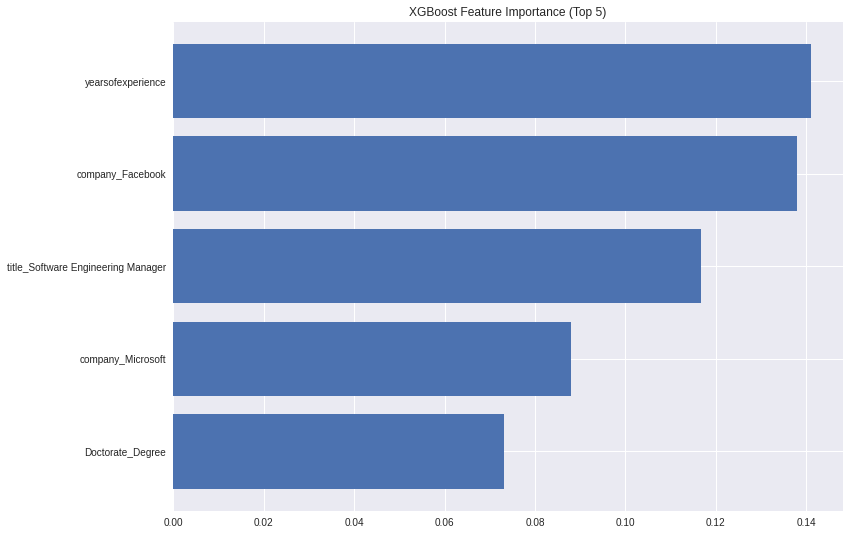

In [95]:
plt.figure(figsize=(12, 9))
plt.barh(fs[-5:].index, fs['Importance'][-5:])
plt.rcParams["font.size"] = "14"
plt.title("XGBoost Feature Importance (Top 5)")
plt.show()

### KNN

In [134]:
knn_train = train[selected_feature]
knn_test = test[selected_feature]

knn_scaler = StandardScaler()
knn_scaler.fit(knn_train)
knn_train = knn_scaler.transform(knn_train)
knn_test = knn_scaler.transform(knn_test)
 
knn_model = KNeighborsRegressor()
knn_test_pred = model_result(knn_model, knn_train, Trainingy, knn_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.5044266353317535
Testing Mean Squared Error: 0.07412190378943599
--------- Training Accuracy ----------
Training R_square: 0.6707595913583434
Training Mean Squared Error: 0.049741332629682104


In [138]:
# hyperparameter tuning by GridSearchCV
n_neighbors = [5, 10, 11, 12, 15]
leaf_size = [1, 3, 5, 10]
hyperF = dict(n_neighbors = n_neighbors, leaf_size = leaf_size)

best_param = parameter_search(knn_model, knn_train, Trainingy, hyperF)
print('best parameters:', best_param)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
best parameters: {'leaf_size': 1, 'n_neighbors': 10}


In [137]:
# fit model using best parameters
knn_best_model = KNeighborsRegressor(n_neighbors=10, leaf_size=1)
knn_test_pred = model_result(knn_best_model, knn_train, Trainingy, knn_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.530156044434996
Testing Mean Squared Error: 0.0702736082149023
--------- Training Accuracy ----------
Training R_square: 0.6070225461252341
Training Mean Squared Error: 0.059370665738741


### SVR

In [122]:
svr_train = train[selected_feature]
svr_test = test[selected_feature]

svr_scaler = StandardScaler()
svr_scaler.fit(svr_train)
svr_train = svr_scaler.transform(svr_train)
svr_test = svr_scaler.transform(svr_test)


svr_model = SVR(kernel = 'rbf')
svr_test_pred = model_result(svr_model, svr_train, Trainingy, svr_test, Testingy)


--------- Testing Accuracy ----------
Testing R_square: 0.6069554922578253
Testing Mean Squared Error: 0.058786870451228664
--------- Training Accuracy ----------
Training R_square: 0.684335943029412
Training Mean Squared Error: 0.04769023013240886


In [133]:
# hyperparameter tuning by GridSearchCV
param_grid = {'C': [0.2, 0.5, 1],
              'kernel': ['rbf', 'sigmoid']}

best_param = parameter_search(svr_model, svr_train, Trainingy, param_grid)
print('best parameters:', best_param)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
best parameters: {'C': 0.5, 'kernel': 'rbf'}


In [130]:
# fit model using best parameters
svr_best_model = SVR(C= 0.5, kernel='rbf')
svr_test_pred = model_result(svr_best_model, svr_train, Trainingy, svr_test, Testingy)

--------- Testing Accuracy ----------
Testing R_square: 0.6083416107401408
Testing Mean Squared Error: 0.05857955151903437
--------- Training Accuracy ----------
Training R_square: 0.6678659784081611
Training Mean Squared Error: 0.05017849696455336
